# Question 1
## Regularization in Linear Regression
Make a class called LinearRegression which provides two functions : fit and predict. You may use the code present in the repository as template. You need to make the following changes in order to include regularization :
1. To initialize an object of the class, you need to provide 4 parameters : learning_rate, epochs, penalty and alpha (coefficient of the regularization term). Penalty and alpha should have default values of None and 0 respectively.
2. The parameter penalty should take in any one of these inputs : L1 (Lasso), L2 (Ridge) and None (simple LR).
3. Do some basic differentiation to find out the expressions of dC/dw and dC/db when regularization is involved. Use internet whenever necessary.
4. Write if-else statements inside the fit method to cover the different values for dw for different values of penalty.

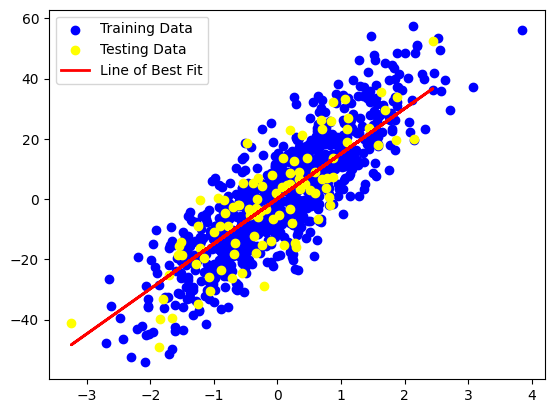

Mean Squared Error: 99.7008845424776


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

class LinearRegression:
    def __init__(self, learning_rate, epochs, penalty=None, alpha=0):
        self.lr = learning_rate
        self.epochs = epochs
        self.penalty = penalty
        self.alpha = alpha

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train = y_train.reshape(-1, 1)
        
        # Initialize parameters
        self.weights = np.zeros((n_features, 1))
        self.bias = np.zeros((1, 1))

        # Gradient descent
        for i in range(self.epochs):
            delta = -(y_train - np.dot(X_train, self.weights) - self.bias) / n_samples
            dw = np.dot(X_train.T, delta)
            db = np.sum(delta).reshape(1, 1)

            # Update weights and biases
            if self.penalty is None:
                self.weights -= self.lr * dw
                self.bias -= self.lr * db
            elif self.penalty == 'L1':
                dw += self.alpha * np.sign(self.weights)
                self.weights -= self.lr * dw
                self.bias -= self.lr * db
            elif self.penalty == 'L2':
                dw += 2 * self.alpha * self.weights
                self.weights -= self.lr * dw
                self.bias -= self.lr * db

    def predict(self, X_test):
        y_predicted = np.dot(X_test, self.weights) + self.bias
        return y_predicted


X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

lr_model = LinearRegression(0.001, 2500, penalty='L2', alpha=0.01)
lr_model.fit(X_train, y_train)
y_predicted = lr_model.predict(X_test)
y_pred = lr_model.predict(X_train)

plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='yellow', label='Testing Data')
plt.plot(X_test, y_predicted, color='red', linewidth=2, label='Line of Best Fit')
plt.legend()
plt.show()

mse = mean_squared_error(y_train, lr_model.predict(X_train))
print('Mean Squared Error:', mse)

# Question 2
# Linear Regression
Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the 3 models created in question 1 (**linear regression, lasso and ridge regression**) and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs, penalty and alpha) to achieve losses close to that of the sklearn models. (*We will cover hyperparameter tuning using GridSearchCV and all in later weeks. For now, you may manually run the model for different values of the hyperparameters.*)

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

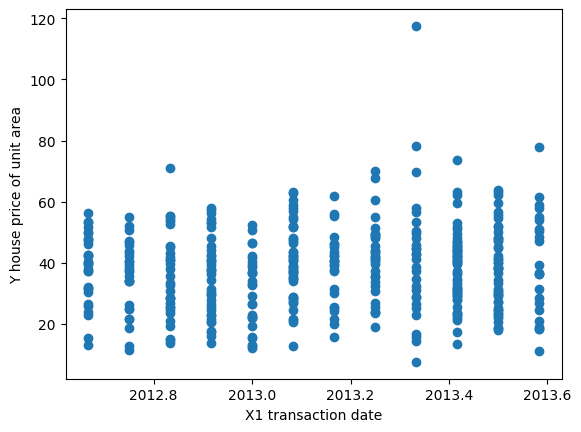

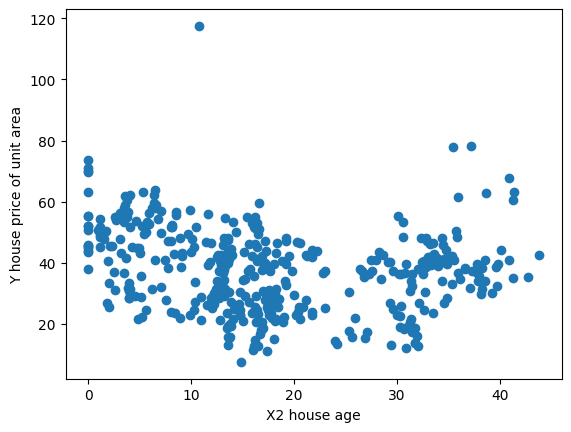

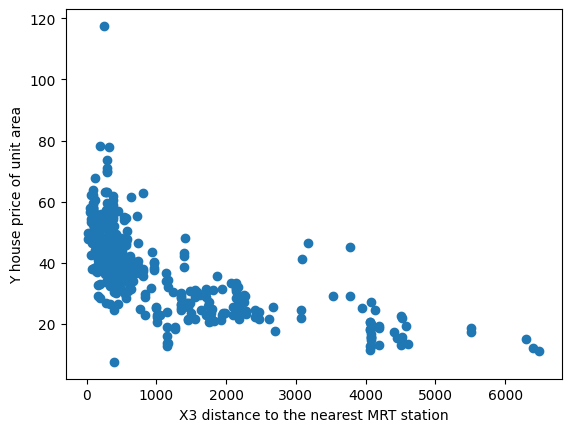

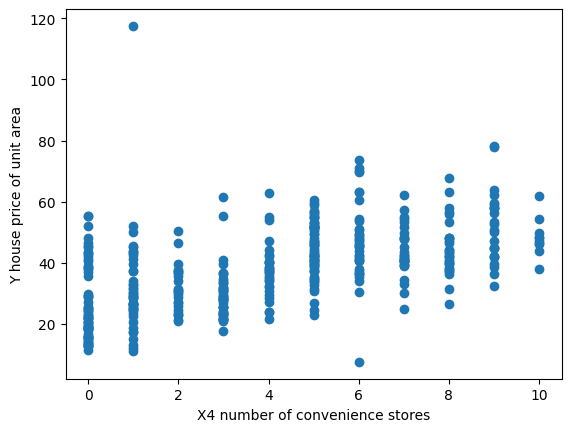

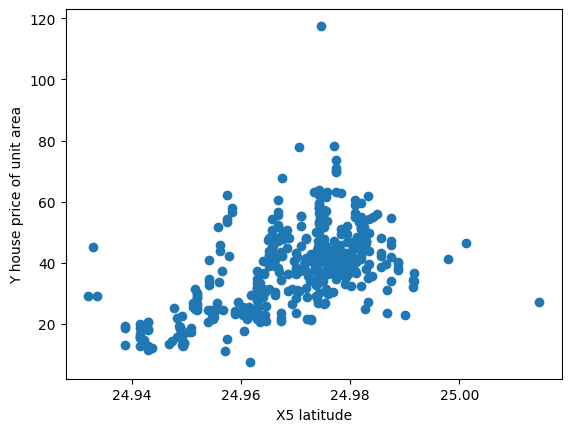

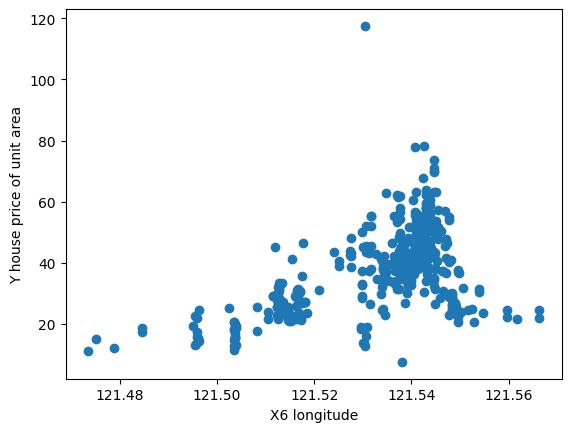

linear_regression_mse :  66.6733627183596
linear_regression_r2 :  0.579662418286177
lasso_mse :  103.34289251487661
lasso_r2 :  0.34848191607631085
ridge_mse :  65.41303409820155
ridge_r2 :  0.5876080724839376


In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Read the dataset using pandas
data = pd.read_csv('Kaggle_real_estate.csv')

# Check for null values
data.isnull().sum()

# Get the column names except the first and last column
columns = data.columns[1:-1]

# Plot the columns against the last column (price)
for column in columns:
    plt.scatter(data[column], data['Y house price of unit area'])
    plt.xlabel(column)
    plt.ylabel('Y house price of unit area')
    plt.show()

# Remove the unwanted columns
unwanted_columns = ['No']
data = data.drop(unwanted_columns, axis=1)

# Split the dataset into train and test data
X = data.drop('Y house price of unit area', axis=1)
y = data['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalize the X_train and X_test
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
linear_regression_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()

# Fit the training data into the models
linear_regression_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Predict the testing data
linear_regression_predictions = linear_regression_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the predictions using MSE and R2
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
linear_regression_r2 = r2_score(y_test, linear_regression_predictions)
print("linear_regression_mse : ",linear_regression_mse)
print("linear_regression_r2 : ",linear_regression_r2)

lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print("lasso_mse : ",lasso_mse)
print("lasso_r2 : ",lasso_r2)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print("ridge_mse : ",ridge_mse)
print("ridge_r2 : ",ridge_r2)

# Initialize the models
sklearn_linear_regression_model = LinearRegression()
sklearn_lasso_model = Lasso()
sklearn_ridge_model = Ridge()

# Fit the training data into the models
sklearn_linear_regression_model.fit(X_train, y_train)
sklearn_lasso_model.fit(X_train, y_train)
sklearn_ridge_model.fit(X_train, y_train)

# Predict the testing data
sklearn_linear_regression_predictions = sklearn

# Question 3
## Logistic Regression
The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


# Load the breast cancer dataset
data = load_breast_cancer()

# Separate the features (X) and target (y) columns
X = data.data
y = data.target

# Normalize the X data using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Create a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


5. Write code for the sigmoid function and Logistic regression.
(Logistic Regression code is available in the Week2/Examples folder. However, try to code it yourself. A template is provided for that.)

*Optional* : Include the regularization terms as you did in the first question. 

In [4]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Implement your Logistic Regression model
class LogisticRegression:
    def __init__(self, learning_rate, epochs):
        # Initialize the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        # Implement the GD algorithm
        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        # Write the predict function
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        y_pred_cls = np.where(y_pred > 0.5, 1, 0)
        return y_pred_cls.flatten()

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [5]:
# Initialize and fit your Logistic Regression model
lr_model = LogisticRegression(learning_rate=0.1, epochs=100)
lr_model.fit(X_train, y_train)

# Make predictions using your model
y_pred_lr_model = lr_model.predict(X_test)

# Compare with scikit-learn's Logistic Regression model
penalties = ['l2', None]  # 'l1' removed due to solver constraint
for penalty in penalties:
    sklearn_lr_model = SklearnLogisticRegression(penalty=penalty, solver='lbfgs')
    sklearn_lr_model.fit(X_train, y_train)
    y_pred_sklearn_lr_model = sklearn_lr_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred_sklearn_lr_model)
    print(f"Accuracy score with penalty '{penalty}': {accuracy}")

your_model_accuracy = accuracy_score(y_test, y_pred_lr_model)
print(f"Accuracy score with your Logistic Regression model: {your_model_accuracy}")

Accuracy score with penalty 'l2': 0.9824561403508771
Accuracy score with penalty 'None': 0.9122807017543859
Accuracy score with your Logistic Regression model: 0.9122807017543859


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .
11. **Optional Challenge** : For the best model in each case (yours and scikit-learn), print the roc_auc_score and plot the roc curves using sklearn.metrics and matplotlib.

Scikit-learn Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
[[41  2]
 [ 0 71]]

Your Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        43
           1       0.88      1.00      0.93        71

    accuracy                           0.91       114
   macro avg       0.94      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114

Confusion Matrix:
[[33 10]
 [ 0 71]]

Scikit-learn Logistic Regression - ROC AUC Score: 0.9980347199475925
Your Logistic Regression - ROC AUC Score: 0.9963969865705863


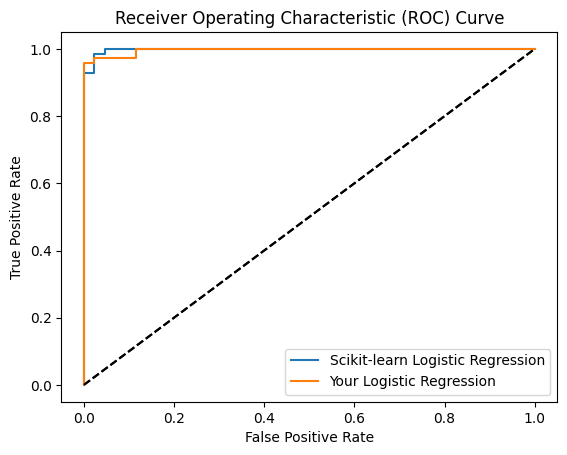

In [6]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()

# Calculate the AUC score and plot the ROC curve for the best model in each case
best_model_lr = SklearnLogisticRegression(penalty='l2', solver='lbfgs')
best_model_lr.fit(X_train, y_train)
y_pred_best_model_lr = best_model_lr.predict(X_test)
best_model_lr_accuracy = accuracy_score(y_test, y_pred_best_model_lr)
best_model_lr_auc = roc_auc_score(y_test, best_model_lr.predict_proba(X_test)[:, 1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, best_model_lr.predict_proba(X_test)[:, 1])

# Initialize and fit your Logistic Regression model
best_model_your_lr = LogisticRegression(learning_rate=0.1, epochs=100)
best_model_your_lr.fit(X_train, y_train)

# Make predictions using your model
y_pred_best_model_your_lr = best_model_your_lr.predict(X_test)
best_model_your_lr_accuracy = accuracy_score(y_test, y_pred_best_model_your_lr)

# Calculate predicted probabilities manually and calculate ROC AUC score
y_pred_prob_best_model_your_lr = sigmoid(np.dot(X_test, best_model_your_lr.weights) + best_model_your_lr.bias)
best_model_your_lr_auc = roc_auc_score(y_test, y_pred_prob_best_model_your_lr)
fpr_your_lr, tpr_your_lr, _ = roc_curve(y_test, y_pred_prob_best_model_your_lr)

# Print classification report and confusion matrix for the best model in each case
print("Scikit-learn Logistic Regression:")
print("Classification Report:")
print(classification_report(y_test, y_pred_best_model_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_model_lr))

print("\nYour Logistic Regression:")
print("Classification Report:")
print(classification_report(y_test, y_pred_best_model_your_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_model_your_lr))

# Print ROC AUC score
print("\nScikit-learn Logistic Regression - ROC AUC Score:", best_model_lr_auc)
print("Your Logistic Regression - ROC AUC Score:", best_model_your_lr_auc)

# Plot ROC curves
plt.figure()
plot_roc_curve(fpr_lr, tpr_lr, label='Scikit-learn Logistic Regression')
plot_roc_curve(fpr_your_lr, tpr_your_lr, label='Your Logistic Regression')
plt.show()

# Question 4
## KNN and Decision Tree
How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass". 

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
glass_data = pd.read_csv('glass.csv')

# Extract the X and Y columns
X = glass_data.iloc[:, :-1].values
Y = glass_data.iloc[:, -1].values

# Split the data into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [8]:
# Convert pandas DataFrame to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Build the KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # You can choose an appropriate value for the number of neighbors (k)

# Fit the model on the training data
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [9]:

# Make predictions using the KNN model
Y_pred = knn.predict(X_test)

# Calculate accuracy using accuracy_score
knn_accuracy = accuracy_score(Y_test, Y_pred)

# Print accuracy for the KNN model
print("KNN Model Accuracy:", knn_accuracy)

# Build and fit the scikit-learn KNN model
sklearn_knn = KNeighborsClassifier(n_neighbors=3)
sklearn_knn.fit(X_train, Y_train)

# Make predictions using the scikit-learn KNN model
Y_pred_sklearn = sklearn_knn.predict(X_test)

# Calculate accuracy using accuracy_score for the scikit-learn KNN model
sklearn_knn_accuracy = accuracy_score(Y_test, Y_pred_sklearn)

# Print accuracy for the scikit-learn KNN model
print("Scikit-learn KNN Model Accuracy:", sklearn_knn_accuracy)

KNN Model Accuracy: 0.7441860465116279
Scikit-learn KNN Model Accuracy: 0.7441860465116279


9. Finally use sklearn.tree to implement a Decision Tree Classifier on this dataset. Check for max depth = 5 to 10. Find out its accuracy.
10. Plot the decision tree.

In [10]:

# Print classification report for the KNN model
print("KNN Model Classification Report:")
print(classification_report(Y_test, Y_pred))

# Print confusion matrix for the KNN model
print("KNN Model Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

# Print classification report for the scikit-learn KNN model
print("Scikit-learn KNN Model Classification Report:")
print(classification_report(Y_test, Y_pred_sklearn))

# Print confusion matrix for the scikit-learn KNN model
print("Scikit-learn KNN Model Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_sklearn))


KNN Model Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.73      0.67        11
           2       0.83      0.71      0.77        14
           3       0.50      0.67      0.57         3
           5       1.00      1.00      1.00         4
           6       0.50      0.33      0.40         3
           7       0.88      0.88      0.88         8

    accuracy                           0.74        43
   macro avg       0.72      0.72      0.71        43
weighted avg       0.75      0.74      0.74        43

KNN Model Confusion Matrix:
[[ 8  1  2  0  0  0]
 [ 4 10  0  0  0  0]
 [ 1  0  2  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  1  0  0  1  1]
 [ 0  0  0  0  1  7]]
Scikit-learn KNN Model Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.73      0.67        11
           2       0.83      0.71      0.77        14
           3       0.50      0.67      0.57         3
      